In [36]:
#imports

import pandas as pd
import numpy as np


#CLF tree imports
from sklearn import tree
import pydotplus 
from IPython.display import Image
from sklearn.metrics import accuracy_score

#knn imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle


import time
import matplotlib.patches as mpatches


from sklearn.metrics import f1_score


import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [9]:
#pre proccessing for Wave data
waveColumns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20', '21','Class'] 
waveData = pd.read_csv('waveform.data', names=waveColumns)

#preproccessing for the german data
germanColumns=['Status of checking account', 'duration in month','credit history', 'purpose', 'credit amount', 'Savings account/bonds', 'present employment since', 'installment rate in percentage of disposable income', 'personal status and sex', 'other debtors / gurantors', 'present residnce sine', 'property', 'age in years', 'other installment plans', 'housing', 'number of existing credits at this bank', 'job', 'Number of people being liable to prodive maintenance for','telephone', 'foreign worker', 'Class'] 

germanData = pd.read_csv('german.data', delimiter=r"\s+",  names=germanColumns) 

#preprocess data/ replace the strings with ints
germanData.replace('A11', 0, inplace=True)
germanData.replace('A12', 1, inplace=True)
germanData.replace('A13', 2, inplace=True)
germanData.replace('A14', 3, inplace=True)

germanData.replace('A30', 0, inplace=True)
germanData.replace('A31', 1, inplace=True)
germanData.replace('A32', 2, inplace=True)
germanData.replace('A33', 3, inplace=True)
germanData.replace('A34', 4, inplace=True)

germanData.replace('A40', 0, inplace=True)
germanData.replace('A41', 1, inplace=True)
germanData.replace('A42', 2, inplace=True)
germanData.replace('A43', 3, inplace=True)
germanData.replace('A44', 4, inplace=True)
germanData.replace('A45', 5, inplace=True)
germanData.replace('A46', 6, inplace=True)
germanData.replace('A47', 8, inplace=True)
germanData.replace('A48', 9, inplace=True)
germanData.replace('A49', 10, inplace=True)
germanData.replace('A410', 11, inplace=True)

germanData.replace('A61', 0, inplace=True)
germanData.replace('A62', 1, inplace=True)
germanData.replace('A63', 2, inplace=True)
germanData.replace('A64', 3, inplace=True)
germanData.replace('A65', 4, inplace=True)

germanData.replace('A71', 0, inplace=True)
germanData.replace('A72', 1, inplace=True)
germanData.replace('A73', 2, inplace=True)
germanData.replace('A74', 3, inplace=True)
germanData.replace('A75', 4, inplace=True)

germanData.replace('A91', 0, inplace=True)
germanData.replace('A92', 1, inplace=True)
germanData.replace('A93', 2, inplace=True)
germanData.replace('A94', 3, inplace=True)
germanData.replace('A95', 4, inplace=True)

germanData.replace('A101', 0, inplace=True)
germanData.replace('A102', 1, inplace=True)
germanData.replace('A103', 2, inplace=True)

germanData.replace('A121', 0, inplace=True)
germanData.replace('A122', 1, inplace=True)
germanData.replace('A123', 2, inplace=True)
germanData.replace('A124', 3, inplace=True)

germanData.replace('A141', 0, inplace=True)
germanData.replace('A142', 1, inplace=True)
germanData.replace('A143', 2, inplace=True)

germanData.replace('A151', 0, inplace=True)
germanData.replace('A152', 1, inplace=True)
germanData.replace('A153', 2, inplace=True)

germanData.replace('A171', 0, inplace=True)
germanData.replace('A172', 1, inplace=True)
germanData.replace('A173', 2, inplace=True)
germanData.replace('A174', 3, inplace=True)

germanData.replace('A191', 0, inplace=True)
germanData.replace('A192', 1, inplace=True)

germanData.replace('A201', 0, inplace=True)
germanData.replace('A202', 1, inplace=True)



## Tree

In [57]:
#wave data tree


repeats = 5
accuracies = []
times = []
fscores = []
for i in range(repeats):
    #randomize the data
    randWaveData = shuffle(waveData)
    #set 90% of the data to train 10% to test
    testWaveData = randWaveData.tail(500)
    trainWaveData = randWaveData.head(4500)

    #set data
    Y = trainWaveData['Class']
    X = trainWaveData.drop(['Class'],axis=1)
    testY = testWaveData['Class']
    testX = testWaveData.drop(['Class'],axis=1)

    #make tree
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
    clf = clf.fit(X, Y)
    
    # get accuracy
    
    start = time.time()
    predY = clf.predict(testX)
    end = time.time()
    times.append(end-start)
    testY = testWaveData['Class']
    acc = accuracy_score(testY, predY)
    accuracies.append(acc)
    
    fscore = f1_score(testY, predY, average='macro')
    fscores.append(fscore) 

avg = 0
for a in accuracies:
    avg = a + avg
avg = avg/repeats
print('average accuracy is: ', avg)

tim = 0
for t in times:
    tim = t + tim
tim = tim/repeats
print('average time is: ', tim, ' seconds')
wavetimes = [tim]

#f score
fscore = 0
for f in fscores:
    fscore = f + fscore
fscore = fscore/repeats
print('average F-measure is: ', fscore)
wavefScores = [fscore]


average accuracy is:  0.6756
average time is:  0.002000093460083008  seconds
average F-measure is:  0.6641780929157857


In [58]:
#german data tree

repeats = 5
accuracies = []
times = []
fscores = []

for i in range(repeats):
    #randomize the data
    randGermanData = shuffle(germanData)
    #set 90% of the data to train 10% to test
    testGermanData = randGermanData.tail(500)
    trainGermanData = randGermanData.head(4500)

    #set data
    Y = trainGermanData['Class']
    X = trainGermanData.drop(['Class'],axis=1)
    testY = testGermanData['Class']
    testX = testGermanData.drop(['Class'],axis=1)

    #make tree
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
    clf = clf.fit(X, Y)
    
    
    start = time.time()
    predY = clf.predict(testX)
    end = time.time()
    times.append(end-start)
    
    testY = testGermanData['Class']
    acc = accuracy_score(testY, predY)
    accuracies.append(acc) 
    
    
    fscore = f1_score(testY, predY, average='macro')
    fscores.append(fscore) 


#accuracy and time
avg = 0
for a in accuracies:
    avg = a + avg
avg = avg/repeats
print('average accuracy is: ', avg)

tim = 0
for t in times:
    tim = t + tim
tim = tim/repeats
print('average time is: ', tim, ' seconds')
germantimes = [tim]

#f score
fscore = 0
for f in fscores:
    fscore = f + fscore
fscore = fscore/repeats
print('average F-measure is: ', fscore)
germanfScores = [fscore]


average accuracy is:  0.7615999999999999
average time is:  0.002000093460083008  seconds
average F-measure is:  0.6858189662702306


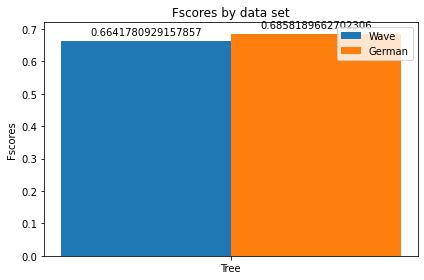

In [61]:


labels = ['Tree']

#f measures
waveF = wavefScores
germanF = germanfScores

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, waveF, width, label='Wave')
rects2 = ax.bar(x + width/2, germanF, width, label='German')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fscores')
ax.set_title('Fscores by data set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

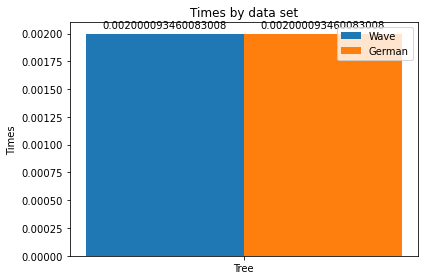

In [60]:
#comparing the results from both data sets for KNN

labels = ['Tree']

#f measures
waveT = wavetimes
germanT = germantimes

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, waveT, width, label='Wave')
rects2 = ax.bar(x + width/2, germanT, width, label='German')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Times')
ax.set_title('Times by data set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
   
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## KNN

In [63]:
#KNN algorithm for wave data

#number of runs
repeats = 5
accuracies = []
times = []
fscores = []



for i in range(repeats):
    #randomize the data
    randWaveData = shuffle(waveData)
    #set 90% of the data to train 10% to test
    testWaveData = randWaveData.tail(500)
    trainWaveData = randWaveData.head(4500)

   #make the KNN classifier
    
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    
    knn.fit( trainWaveData.drop(['Class'],axis=1),trainWaveData['Class'])
    
    # get accuracy and time
    start = time.time()
    predY = knn.predict(testWaveData.drop(['Class'],axis=1))
    end = time.time()
    times.append(end-start)
    
    
    testY = testWaveData['Class']
    acc = accuracy_score(testY, predY)
    accuracies.append(acc) 
    #print('Accuracy on test number ', i+1, ' is %.2f' % (acc))

      
    fscore = f1_score(testY, predY, average='macro')
    fscores.append(fscore) 

    
avg = 0
for a in accuracies:
    avg = a + avg
avg = avg/repeats
print('average accuracy is: ', avg)

tim = 0
for t in times:
    tim = t + tim
tim = tim/repeats
print('average time is: ', tim, ' seconds')
wavetimes = [tim]

#f score
fscore = 0
for f in fscores:
    fscore = f + fscore
fscore = fscore/repeats
print('average F-measure is: ', fscore)
wavefScores = [fscore]


average accuracy is:  0.8224
average time is:  0.11280646324157714  seconds
average F-measure is:  0.8206980184637848


In [64]:
#KNN algorithm for german data
#number of runs
repeats = 5
accuracies = []
times = []
fscores = []

for i in range(repeats):
    #randomize the data
    randData = shuffle(germanData)
    #set 90% of the data to train 10% to test
    testGermanData = randData.tail(500)
    trainGermanData = randData.head(4500)

   #make the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit( trainGermanData.drop(['Class'],axis=1),trainGermanData['Class'])

    # get accuracy and time
    start = time.time()
    predY = knn.predict(testGermanData.drop(['Class'],axis=1))
    end = time.time()
    times.append(end-start)
    
    testY = testGermanData['Class']
    acc = accuracy_score(testY, predY)
    accuracies.append(acc) 
    #print('Accuracy on test number ', i+1, ' is %.2f' % (acc))

    
      
    fscore = f1_score(testY, predY, average='macro')
    fscores.append(fscore) 

    
    
avg = 0
for a in accuracies:
    avg = a + avg
avg = avg/repeats
print('average accuracy is: ', avg)

tim = 0
for t in times:
    tim = t + tim
tim = tim/repeats
print('average time is: ', tim, ' seconds')
germantimes = [tim]

#f score
fscore = 0
for f in fscores:
    fscore = f + fscore
fscore = fscore/repeats
print('average F-measure is: ', fscore)

germanfScores = [fscore]

average accuracy is:  0.7451999999999999
average time is:  0.026201486587524414  seconds
average F-measure is:  0.6533016628650288


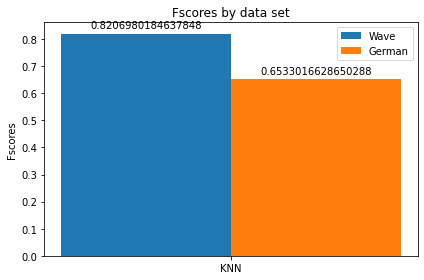

In [65]:
#comparing the results from both data sets for KNN
#germantimes = times

labels = ['KNN']

#f measures
waveF = wavefScores
germanF = germanfScores

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, waveF, width, label='Wave')
rects2 = ax.bar(x + width/2, germanF, width, label='German')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fscores')
ax.set_title('Fscores by data set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
   
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

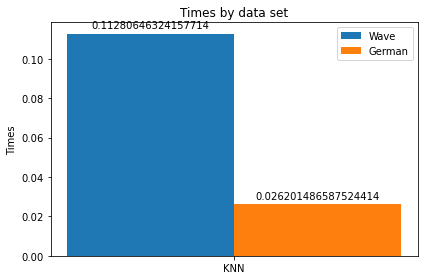

In [66]:
#comparing the results from both data sets for KNN


labels = ['KNN']

#f measures
waveT = wavetimes
germanT = germantimes

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, waveT, width, label='Wave')
rects2 = ax.bar(x + width/2, germanT, width, label='German')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Times')
ax.set_title('Times by data set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
   
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()